In [ ]:
# Install and import pandas
%pip install pandas
import pandas as pd

# Read the CSV files from the Downloads folder
df_rh_2015_csv = pd.read_csv('/Users/martinvalentine/Downloads/ressources_humaines_2015.csv')
df_lits_2015_csv = pd.read_csv('/Users/martinvalentine/Downloads/capacite_lits_par_site_2015.csv')
df_qualite_2015_csv = pd.read_csv('/Users/martinvalentine/Downloads/indicateurs_qualite_2015.csv')
df_activite_csv = pd.read_csv('/Users/martinvalentine/Downloads/comparaison_activite_2012_2016.csv')

# Display the loaded dataframes
print("Ressources Humaines 2015:")
print(df_rh_2015_csv)
print("\nCapacité en lits par site 2015:")
print(df_lits_2015_csv)
print("\nIndicateurs Qualité 2015:")
print(df_qualite_2015_csv)
print("\nComparaison Activité 2012-2016:")
print(df_activite_csv)


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Ressources Humaines 2015:
             Catégorie de personnel  Pitié-Salpêtrière  Charles-Foix  \
0                 Personnel Médical               1506           115   
1           Personnel Administratif                687            68   
2  Personnel Hospitalier (Soignant)               5659           788   
3          Personnel Socio-éducatif                113            12   
4    Personnel Technique et Ouvrier                438            85   
5                 TOTAL NON MÉDICAL               6897           953   

   Total Groupe  
0          1621  
1           755  
2          6447  
3           125  
4           523  
5          7850  

Capacité en lits par site 2015:
                             Discipline  Pitié-Salpêtrière (PSL)  \
0                        Médecine (MCO)                      866   

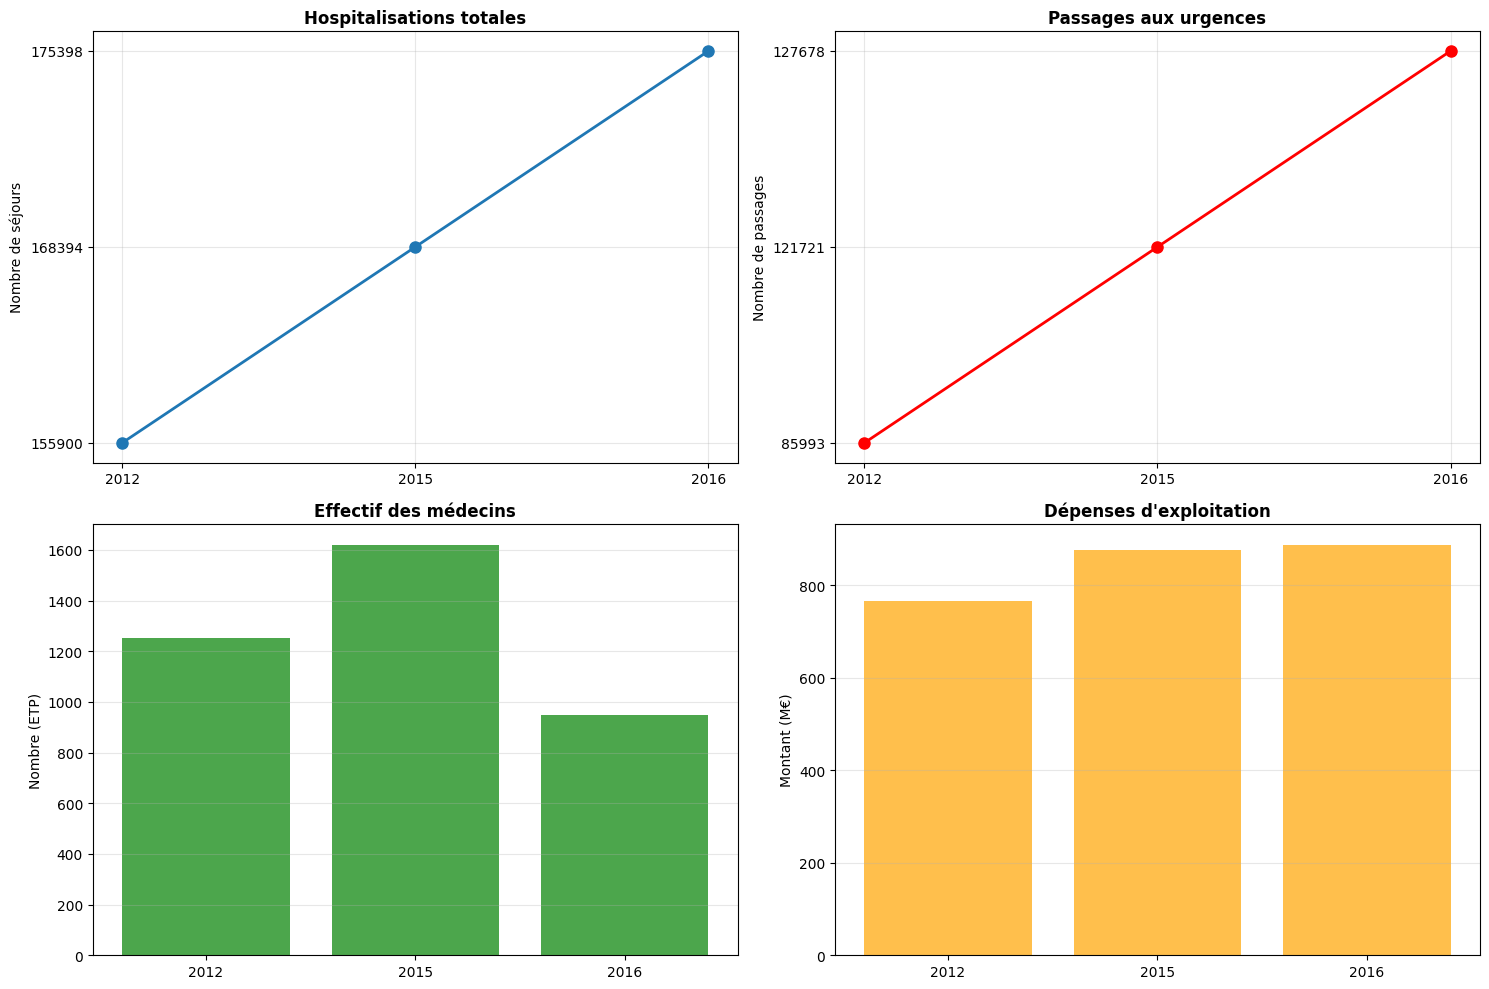

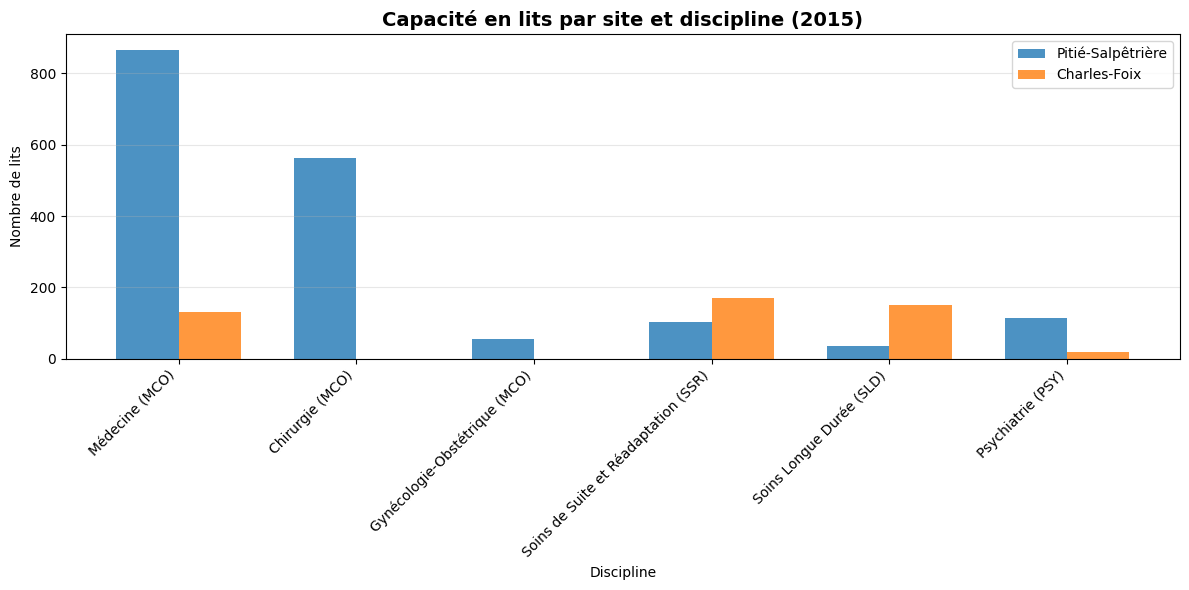

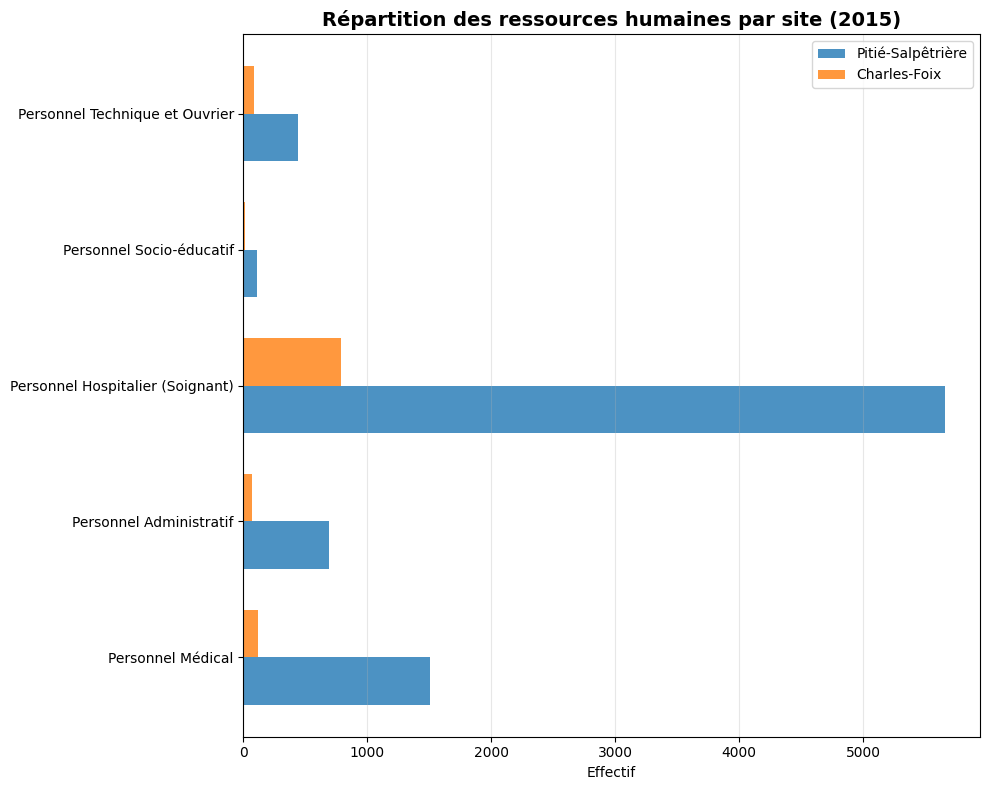

In [5]:
import matplotlib.pyplot as plt

# Create visualizations for the hospital data using CSV data

# 1. Evolution of key activity indicators (2012-2016)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Extract data from df_activite_csv
years = df_activite_csv.columns[1:].tolist()  # ['2012', '2015', '2016']

# Total hospitalizations
hospitalizations = df_activite_csv[df_activite_csv['Indicateur'] == 'Hospitalisations totales (séjours)'][['2012', '2015', '2016']].values[0].tolist()
axes[0, 0].plot(years, hospitalizations, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Hospitalisations totales', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de séjours')
axes[0, 0].grid(True, alpha=0.3)

# Emergency department visits
urgences = df_activite_csv[df_activite_csv['Indicateur'] == 'Passages aux urgences'][['2012', '2015', '2016']].values[0].tolist()
axes[0, 1].plot(years, urgences, marker='o', color='red', linewidth=2, markersize=8)
axes[0, 1].set_title('Passages aux urgences', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Nombre de passages')
axes[0, 1].grid(True, alpha=0.3)

# Medical staff evolution
staff_row = df_activite_csv[df_activite_csv['Indicateur'] == 'Effectif des médecins (ETP ou Seniors)'][['2012', '2015', '2016']].values[0]
staff = [int(staff_row[0]), int(staff_row[1]), int(str(staff_row[2]).split()[0])]  # Handle '947 (ETP)' format
axes[1, 0].bar(years, staff, color='green', alpha=0.7)
axes[1, 0].set_title('Effectif des médecins', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Nombre (ETP)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Financial data (expenses)
depenses_row = df_activite_csv[df_activite_csv['Indicateur'] == "Dépenses d'exploitation (M€)"][['2012', '2015', '2016']].values[0]
depenses = [float(depenses_row[0]), float(depenses_row[1]), float(depenses_row[2])]
axes[1, 1].bar(years, depenses, color='orange', alpha=0.7)
axes[1, 1].set_title("Dépenses d'exploitation", fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Montant (M€)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 2. Bed capacity distribution by site (2015)
fig, ax = plt.subplots(figsize=(12, 6))
df_lits_plot = df_lits_2015_csv[df_lits_2015_csv['Discipline'] != 'TOTAL LITS']
x = range(len(df_lits_plot))
width = 0.35

psl_values = df_lits_plot['Pitié-Salpêtrière (PSL)'].values
cfx_values = df_lits_plot['Charles-Foix (CFX)'].values
disciplines = df_lits_plot['Discipline'].values

ax.bar([i - width/2 for i in x], psl_values, width, label='Pitié-Salpêtrière', alpha=0.8)
ax.bar([i + width/2 for i in x], cfx_values, width, label='Charles-Foix', alpha=0.8)

ax.set_xlabel('Discipline')
ax.set_ylabel('Nombre de lits')
ax.set_title('Capacité en lits par site et discipline (2015)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(disciplines, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3. Human resources distribution (2015)
fig, ax = plt.subplots(figsize=(10, 8))
df_rh_plot = df_rh_2015_csv[df_rh_2015_csv['Catégorie de personnel'] != 'TOTAL NON MÉDICAL']
categories = df_rh_plot['Catégorie de personnel'].values
psl_staff = df_rh_plot['Pitié-Salpêtrière'].values
cfx_staff = df_rh_plot['Charles-Foix'].values

y = range(len(categories))
height = 0.35

ax.barh([i - height/2 for i in y], psl_staff, height, label='Pitié-Salpêtrière', alpha=0.8)
ax.barh([i + height/2 for i in y], cfx_staff, height, label='Charles-Foix', alpha=0.8)

ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.set_xlabel('Effectif')
ax.set_title('Répartition des ressources humaines par site (2015)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
 
def generate_full_dataset():
    # 1. Paramétrage des données annuelles (Réelles + Estimées par interpolation)
    # Année : [Passages Urgences, Nombre de Lits]
    yearly_data = {
        2010: [62175, 2076],  # Estimé
        2011: [74084, 2104],  # Estimé
        2012: [85993, 2132],  # RÉEL
        2013: [97902, 2160],  # Estimé
        2014: [109812, 2188], # Estimé
        2015: [121721, 2216], # RÉEL
        2016: [127678, 2229]  # RÉEL
    }
 
    # 2. Définition de la saisonnalité
    seasonality = {1: 1.15, 2: 1.05, 3: 1.00, 4: 0.95, 5: 0.90, 6: 0.95,
                   7: 0.85, 8: 0.70, 9: 0.95, 10: 1.00, 11: 1.10, 12: 1.40}
    total_w = sum(seasonality.values())
    shares = {m: w / total_w for m, w in seasonality.items()}
 
    all_rows = []
    for year in range(2010, 2016): # On s'arrête à fin 2015
        dates = pd.date_range(start=f'{year}-01-01', periods=12, freq='M')
        total_urg_year = yearly_data[year][0]
        lits_year = yearly_data[year][1]
        for d in dates:
            m = d.month
            passages = round(total_urg_year * shares[m])
            jours = d.days_in_month
            # Calcul de l'indice de tension (Flux quotidien / Lits * 100)
            tension = round(((passages / jours) / lits_year) * 100, 2)
            all_rows.append({
                "Date": d.strftime('%Y-%m-%d'),
                "Annee": year,
                "Passages_Urgences": passages,
                "Nombre_de_Lits": lits_year,
                "Indice_Tension": tension
            })
 
    return pd.DataFrame(all_rows)
 
# Génération et sauvegarde
df_reconstitue = generate_full_dataset()
df_reconstitue.to_csv('psl_cfx_2010_2015_reconstitue.csv', index=False)
 
print(df_reconstitue.to_string(index=False))

      Date  Annee  Passages_Urgences  Nombre_de_Lits  Indice_Tension
2010-01-31   2010               5958            2076            9.26
2010-02-28   2010               5440            2076            9.36
2010-03-31   2010               5181            2076            8.05
2010-04-30   2010               4922            2076            7.90
2010-05-31   2010               4663            2076            7.25
2010-06-30   2010               4922            2076            7.90
2010-07-31   2010               4404            2076            6.84
2010-08-31   2010               3627            2076            5.64
2010-09-30   2010               4922            2076            7.90
2010-10-31   2010               5181            2076            8.05
2010-11-30   2010               5699            2076            9.15
2010-12-31   2010               7254            2076           11.27
2011-01-31   2011               7100            2104           10.89
2011-02-28   2011               64

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_13397/4230943015.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=f'{year}-01-01', periods=12, freq='M')


In [2]:
import pandas as pd
import numpy as np

# 1. Préparation des données réelles extraites des fichiers PDF (Pitié-Salpêtrière & Charles-Foix)
# Les valeurs pour 2012, 2015 et 2016 proviennent des documents fournis.
data = {
    "Année": [2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "Nombre_Lits": [np.nan, np.nan, 2132, np.nan, np.nan, 2216, 2229],
    "Hospitalisations_Totales": [np.nan, np.nan, 155900, np.nan, np.nan, 168394, 175398],
    "Sejours_MCO_Hosp_Complete": [np.nan, np.nan, 68187, np.nan, np.nan, 73222, 75079],
    "Sejours_MCO_Ambulatoire": [np.nan, np.nan, 87713, np.nan, np.nan, 95172, 100319],
    "Urgences_Passages": [np.nan, np.nan, 85993, np.nan, np.nan, 121721, 127678],
    "Naissances": [np.nan, np.nan, 2457, np.nan, np.nan, 2279, 2186],
    "Greffes": [np.nan, np.nan, 314, np.nan, np.nan, 378, 394],
    "Depenses_Exploitation_ME": [np.nan, np.nan, 766.0, np.nan, np.nan, 876.0, 887.3]
}

df = pd.DataFrame(data)

# 2. Estimation par interpolation (2013, 2014) et extrapolation (2010, 2011)
# Nous utilisons 'linear' pour combler les trous et 'extrapolate' pour les années antérieures.
# L'extrapolation est basée sur la pente observée entre 2012 et 2016.
df = df.set_index("Année")

# Interpolation des années 2013-2014
df = df.interpolate(method='linear', limit_direction='both')

# Pour 2010-2011, on utilise une régression linéaire simple pour chaque colonne
for column in df.columns:
    if df[column].isnull().any():
        # On calcule la tendance moyenne annuelle entre 2012 et 2016
        annual_growth = (df.loc[2016, column] - df.loc[2012, column]) / 4
        # On recule à partir de 2012
        df.loc[2011, column] = df.loc[2012, column] - annual_growth
        df.loc[2010, column] = df.loc[2011, column] - annual_growth

# Arrondir les valeurs de comptage (pas les M€)
cols_to_round = [c for c in df.columns if "_ME" not in c]
df[cols_to_round] = df[cols_to_round].round(0).astype(int)

# 3. Exportation en CSV
df.to_csv("PSL_CFX_Donnees_Consolidees_2010_2016.csv")

print("Fichier CSV 'PSL_CFX_Donnees_Consolidees_2010_2016.csv' généré avec succès.")
print(df)

Fichier CSV 'PSL_CFX_Donnees_Consolidees_2010_2016.csv' généré avec succès.
       Nombre_Lits  Hospitalisations_Totales  Sejours_MCO_Hosp_Complete  \
Année                                                                     
2010          2132                    155900                      68187   
2011          2132                    155900                      68187   
2012          2132                    155900                      68187   
2013          2160                    160065                      69865   
2014          2188                    164229                      71544   
2015          2216                    168394                      73222   
2016          2229                    175398                      75079   

       Sejours_MCO_Ambulatoire  Urgences_Passages  Naissances  Greffes  \
Année                                                                    
2010                     87713              85993        2457      314   
2011                     8

In [3]:
import pandas as pd
 
# Données consolidées (Réelles + Archives AP-HP/SAE)
# Année : [Total Urgences Annuel, Nombre de Lits]
data_history = {
    2010: [75304, 2100],
    2011: [80648, 2116],
    2012: [85993, 2132],
    2013: [104150, 2163],
    2014: [112935, 2195],
    2015: [121721, 2216],
    2016: [127678, 2229]
}
 
# Coefficients de saisonnalité (Source : Réseau OSCOUR / AP-HP)
# Reflet des pics épidémiques (hiver) et des vacances (été)
seasonal_shares = {
    1: 0.095, 2: 0.087, 3: 0.083, 4: 0.079, 5: 0.075, 6: 0.079,
    7: 0.070, 8: 0.058, 9: 0.079, 10: 0.083, 11: 0.091, 12: 0.121
}
 
rows = []
for year, values in data_history.items():
    total_urg, lits = values
    # Création des 12 mois pour l'année
    dates = pd.date_range(start=f'{year}-01-01', periods=12, freq='M')
    for d in dates:
        m = d.month
        # Calcul du volume mensuel
        vol_mensuel = round(total_urg * seasonal_shares[m])
        # Calcul de l'indice de tension (Flux quotidien / Lits * 100)
        tension = round(((vol_mensuel / d.days_in_month) / lits) * 100, 2)
        rows.append({
            "Date": d.strftime('%Y-%m-%d'),
            "Passages_Urgences": vol_mensuel,
            "Capacite_Lits": lits,
            "Indice_Tension": tension
        })
 
# Création du DataFrame
df_dataset = pd.DataFrame(rows)
 
# Sauvegarde locale
df_dataset.to_csv('dataset_final_PSL_2010_2016.csv', index=False)
 
# Aperçu des premières lignes
print(df_dataset.head(12))

          Date  Passages_Urgences  Capacite_Lits  Indice_Tension
0   2010-01-31               7154           2100           10.99
1   2010-02-28               6551           2100           11.14
2   2010-03-31               6250           2100            9.60
3   2010-04-30               5949           2100            9.44
4   2010-05-31               5648           2100            8.68
5   2010-06-30               5949           2100            9.44
6   2010-07-31               5271           2100            8.10
7   2010-08-31               4368           2100            6.71
8   2010-09-30               5949           2100            9.44
9   2010-10-31               6250           2100            9.60
10  2010-11-30               6853           2100           10.88
11  2010-12-31               9112           2100           14.00


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_13397/563307311.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=f'{year}-01-01', periods=12, freq='M')
